In [35]:
pip install streamlit


                                              0.0/8.5 MB ? eta -:--:--
                                              0.1/8.5 MB 2.6 MB/s eta 0:00:04
     -                                        0.4/8.5 MB 4.6 MB/s eta 0:00:02
     --                                       0.6/8.5 MB 4.4 MB/s eta 0:00:02
     ----                                     0.9/8.5 MB 4.7 MB/s eta 0:00:02
     -----                                    1.1/8.5 MB 4.7 MB/s eta 0:00:02
     ------                                   1.3/8.5 MB 4.7 MB/s eta 0:00:02
     -------                                  1.6/8.5 MB 5.0 MB/s eta 0:00:02
     --------                                 1.8/8.5 MB 4.8 MB/s eta 0:00:02
     ----------                               2.2/8.5 MB 5.1 MB/s eta 0:00:02
     -----------                              2.4/8.5 MB 5.1 MB/s eta 0:00:02
     ------------                             2.6/8.5 MB 5.1 MB/s eta 0:00:02
     -------------                            2.8/8.5 MB 5.0 MB/s eta 0


[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [36]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

import unidecode
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from bs4 import BeautifulSoup
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from string import punctuation
from collections import Counter
from openpyxl import Workbook
import contractions
import re

import streamlit as st


[nltk_data] Downloading package punkt to C:\Users\OMOJOLA
[nltk_data]     OLUWAFEMI\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\OMOJOLA
[nltk_data]     OLUWAFEMI\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
data = pd.read_csv("testing.csv")
data

,Title,Description,Requirement,Job_type,Location,Salary,Company,Industry
0,Computer Operator,Job Description\n\n We are look...,No Experience,Permanent,NaN,NaN,NaN,NaN
1,Medical Sales Representative-Lagos,Job Description\n\n Excel Chari...,1 year,Permanent,NaN,NaN,NaN,NaN
2,Client Success Associate,Job Description\n\n Job Title: ...,3 to 4 years,Permanent,NaN,NaN,NaN,NaN
3,Sales Support Specialist,Job Description\n\n To join our...,1 year,Remote,NaN,NaN,NaN,NaN
4,Database Administrator II,Job Description\n\n MAIN FUNCTI...,3 to 4 years,Contract,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2347,"Instructors for Data Analysis, Graphic Design,...",Education / TeachingÃÂÃÂÃÂÃÂÃÂÃÂÃ...,Job Type Full Time\nQualification BA/BSc/HND\n...,Full Time,Kano,NaN,NaN,NaN
2348,Data Manager,ICT / Computer,"Job Type Contract , Full Time\nQualification B...","Contract , Full Time",Lagos,NaN,NaN,NaN
2349,"Team Lead, Data Insights","Data, Business Analysis and AI",Job Type Full Time\nQualification BA/BSc/HND\n...,Full Time,Lagos,NaN,NaN,NaN
2350,Data Analyst,"Data, Business Analysis and AI","We are seeking an enquiring, precise data anal...",Full Time,Lagos,NaN,NaN,NaN


In [3]:
import re

def remove_special_chars(text):
    if isinstance(text, str):  # Check if input is a string
        text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    return text

# Let's remove special characters in the "Job Description" column of the data
data['Description'] = data['Description'].apply(lambda x: remove_special_chars(x))

data

,Title,Description,Requirement,Job_type,Location,Salary,Company,Industry
0,Computer Operator,Job Description\n\n We are look...,No Experience,Permanent,NaN,NaN,NaN,NaN
1,Medical Sales Representative-Lagos,Job Description\n\n Excel Chari...,1 year,Permanent,NaN,NaN,NaN,NaN
2,Client Success Associate,Job Description\n\n Job Title C...,3 to 4 years,Permanent,NaN,NaN,NaN,NaN
3,Sales Support Specialist,Job Description\n\n To join our...,1 year,Remote,NaN,NaN,NaN,NaN
4,Database Administrator II,Job Description\n\n MAIN FUNCTI...,3 to 4 years,Contract,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2347,"Instructors for Data Analysis, Graphic Design,...",Education Teaching ICT Computer,Job Type Full Time\nQualification BA/BSc/HND\n...,Full Time,Kano,NaN,NaN,NaN
2348,Data Manager,ICT Computer,"Job Type Contract , Full Time\nQualification B...","Contract , Full Time",Lagos,NaN,NaN,NaN
2349,"Team Lead, Data Insights",Data Business Analysis and AI,Job Type Full Time\nQualification BA/BSc/HND\n...,Full Time,Lagos,NaN,NaN,NaN
2350,Data Analyst,Data Business Analysis and AI,"We are seeking an enquiring, precise data anal...",Full Time,Lagos,NaN,NaN,NaN


In [4]:
import contractions

def replace_contractions(text):
    if isinstance(text, str):  # Check if input is a string
        return contractions.fix(text)
    else:
        return text  # Return input unchanged if it's not a string

# Let's fix the contractions in the data
data['Description'] = data['Description'].apply(lambda x: replace_contractions(x))

data.head()

,Title,Description,Requirement,Job_type,Location,Salary,Company,Industry
0,Computer Operator,Job Description\n\n We are look...,No Experience,Permanent,NaN,NaN,NaN,NaN
1,Medical Sales Representative-Lagos,Job Description\n\n Excel Chari...,1 year,Permanent,NaN,NaN,NaN,NaN
2,Client Success Associate,Job Description\n\n Job Title C...,3 to 4 years,Permanent,NaN,NaN,NaN,NaN
3,Sales Support Specialist,Job Description\n\n To join our...,1 year,Remote,NaN,NaN,NaN,NaN
4,Database Administrator II,Job Description\n\n MAIN FUNCTI...,3 to 4 years,Contract,NaN,NaN,NaN,NaN


In [5]:

# Define the word to remove
word_to_remove = "Job Description"

# Function to remove the word
def remove_word(text, word_to_remove):
    if isinstance(text, str):
        text = re.sub(r'\b' + re.escape(word_to_remove) + r'\b', '', text, flags=re.I)
        return text.strip()
    else:
        return text  # Return unchanged if not a string


# Apply the remove_word function to the 'reviews' column
data['Description'] = data['Description'].apply(lambda x: remove_word(x, word_to_remove))

data

,Title,Description,Requirement,Job_type,Location,Salary,Company,Industry
0,Computer Operator,We are looking for a computer operator to join...,No Experience,Permanent,NaN,NaN,NaN,NaN
1,Medical Sales Representative-Lagos,Excel Charis Pharmaceutical Chemical Limited i...,1 year,Permanent,NaN,NaN,NaN,NaN
2,Client Success Associate,Job Title Client Success Associate\r\nSector H...,3 to 4 years,Permanent,NaN,NaN,NaN,NaN
3,Sales Support Specialist,To join our organization which is expanding al...,1 year,Remote,NaN,NaN,NaN,NaN
4,Database Administrator II,MAIN FUNCTIONS\r\nUses structured query langua...,3 to 4 years,Contract,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2347,"Instructors for Data Analysis, Graphic Design,...",Education Teaching ICT Computer,Job Type Full Time\nQualification BA/BSc/HND\n...,Full Time,Kano,NaN,NaN,NaN
2348,Data Manager,ICT Computer,"Job Type Contract , Full Time\nQualification B...","Contract , Full Time",Lagos,NaN,NaN,NaN
2349,"Team Lead, Data Insights",Data Business Analysis and AI,Job Type Full Time\nQualification BA/BSc/HND\n...,Full Time,Lagos,NaN,NaN,NaN
2350,Data Analyst,Data Business Analysis and AI,"We are seeking an enquiring, precise data anal...",Full Time,Lagos,NaN,NaN,NaN


In [6]:
# Function to remove HTML characters
def remove_html_tags(text):
    if isinstance(text, str):
        soup = BeautifulSoup(text, 'html.parser')
        return soup.get_text()
    else:
        return text  # Return unchanged if not a string

# Apply the remove_html_tags function to the 'reviews' column
data['Description'] = data['Description'].apply(remove_html_tags)

data.head()

,Title,Description,Requirement,Job_type,Location,Salary,Company,Industry
0,Computer Operator,We are looking for a computer operator to join...,No Experience,Permanent,NaN,NaN,NaN,NaN
1,Medical Sales Representative-Lagos,Excel Charis Pharmaceutical Chemical Limited i...,1 year,Permanent,NaN,NaN,NaN,NaN
2,Client Success Associate,Job Title Client Success Associate\r\nSector H...,3 to 4 years,Permanent,NaN,NaN,NaN,NaN
3,Sales Support Specialist,To join our organization which is expanding al...,1 year,Remote,NaN,NaN,NaN,NaN
4,Database Administrator II,MAIN FUNCTIONS\r\nUses structured query langua...,3 to 4 years,Contract,NaN,NaN,NaN,NaN


In [7]:
# Fill missing values in the 'Description' column with an empty string
data['Description'].fillna('', inplace=True)

In [8]:
# Fill missing values in the 'Description' column with an empty string
data['Requirement'].fillna('', inplace=True)

In [9]:
data.isna().sum()

Title             0
Description       0
Requirement       0
Job_type         21
Location        527
Salary         2094
Company        2325
Industry       2101
dtype: int64

In [10]:
df = data['Description']

# Set Pandas display options to show more characters in each cell
pd.set_option('display.max_colwidth', None)



df.head()

0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       

In [11]:
data


Title  \
0                                                                  Computer Operator   
1                                                 Medical Sales Representative-Lagos   
2                                                           Client Success Associate   
3                                                           Sales Support Specialist   
4                                                          Database Administrator II   
...                                                                              ...   
2347  Instructors for Data Analysis, Graphic Design, Web Development & Cybersecurity   
2348                                                                    Data Manager   
2349                                                        Team Lead, Data Insights   
2350                                                                    Data Analyst   
2351                                                                  Data Scientist   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              

In [12]:
def crt_wordcloud(data):
    desc = data

    words = ' '.join(desc['Description'].astype(str))

    cleaned_word = " ".join([word for word in words.split()])
    
    wordcloud = WordCloud(stopwords = STOPWORDS,
                      background_color = 'black',
                      width = 3000,
                      height = 2500
                     ).generate(cleaned_word)
    
    plt.figure(1, figsize = (12, 12))

    plt.imshow(wordcloud)

    plt.axis('off')

    plt.show()


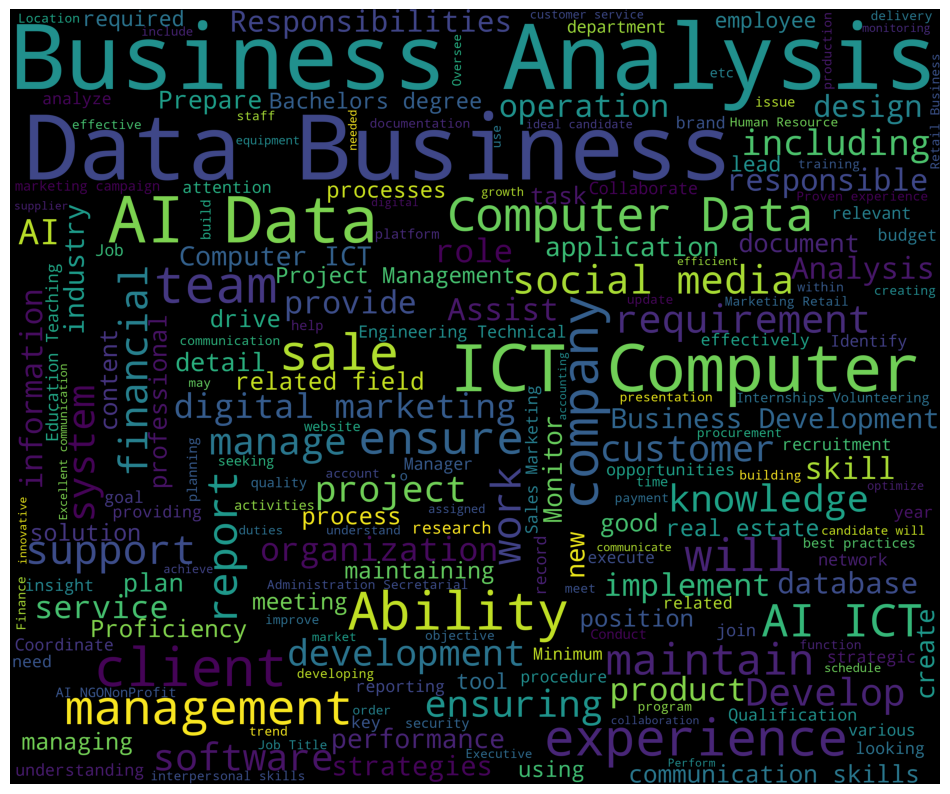

In [13]:
crt_wordcloud(data)

### Treating the Requirement Column

In [14]:
import re

def remove_special_chars(text):
    if isinstance(text, str):  # Check if input is a string
        text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    return text

# Let's remove special characters in the "Job Description" column of the data
data['Requirement'] = data['Requirement'].apply(lambda x: remove_special_chars(x))

data.head()

Title  \
0                   Computer Operator   
1  Medical Sales Representative-Lagos   
2            Client Success Associate   
3            Sales Support Specialist   
4           Database Administrator II   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         

In [15]:
import contractions

def replace_contractions(text):
    if isinstance(text, str):  # Check if input is a string
        return contractions.fix(text)
    else:
        return text  # Return input unchanged if it's not a string

# Let's fix the contractions in the data
data['Requirement'] = data['Requirement'].apply(lambda x: replace_contractions(x))

data

Title  \
0                                                                  Computer Operator   
1                                                 Medical Sales Representative-Lagos   
2                                                           Client Success Associate   
3                                                           Sales Support Specialist   
4                                                          Database Administrator II   
...                                                                              ...   
2347  Instructors for Data Analysis, Graphic Design, Web Development & Cybersecurity   
2348                                                                    Data Manager   
2349                                                        Team Lead, Data Insights   
2350                                                                    Data Analyst   
2351                                                                  Data Scientist   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              

In [16]:

# Define the word to remove
word_to_remove = "Job Type"

# Function to remove the word
def remove_word(text, word_to_remove):
    if isinstance(text, str):
        text = re.sub(r'\b' + re.escape(word_to_remove) + r'\b', '', text, flags=re.I)
        return text.strip()
    else:
        return text  # Return unchanged if not a string


# Apply the remove_word function to the 'reviews' column
data['Requirement'] = data['Requirement'].apply(lambda x: remove_word(x, word_to_remove))

data

Title  \
0                                                                  Computer Operator   
1                                                 Medical Sales Representative-Lagos   
2                                                           Client Success Associate   
3                                                           Sales Support Specialist   
4                                                          Database Administrator II   
...                                                                              ...   
2347  Instructors for Data Analysis, Graphic Design, Web Development & Cybersecurity   
2348                                                                    Data Manager   
2349                                                        Team Lead, Data Insights   
2350                                                                    Data Analyst   
2351                                                                  Data Scientist   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              

In [17]:

# Define the words you want to filter by
words_to_keep = ['Data', 'Analyst', 'excel', 'machine learning', 'analysis', 'AI', 'analyse', 'machine learning', 'SQL' ]  # Add or remove words as needed

# Filter the DataFrame to keep only rows containing the specified words in the 'reviews' column
x = data[data['Title'].str.contains('|'.join(words_to_keep), case=False)]

# Display the filtered DataFrame
x

,Title,Description,Requirement,Job_type,Location,Salary,Company,Industry
4,Database Administrator II,MAIN FUNCTIONS\r\nUses structured query language SQL to design program secure maintain and integrate databases Processes complex data requests Ensures that systems are running efficiently \r\nMay perform testing on databases in support of modifications or upgrades \r\nMakes recommendations for improvements to database \r\nWorks with moderate work direction and can identify issuesproblems but may need assistance in resolving\n\nThis position would typically include senior Database Administrator who is able to perform tasks of high complexity and difficulty Such individual could also manage and train other team members and lead projects\n\nSKILLS AND QUALIFICATIONS\r\nPrevious experience as an IT professional and as a MS SQL Server Database Administrator SQL database knowledge data structure analytical skills\n\nSCOPE OF WORK\r\nLitigation data analysis modelling forecast and reporting case activity status followup and capture litigation docket statistics lowlevel IT support firstline invoice review document review cataloging and archiving miscellaneous administrative powerpoint preparations\n\n ADDITIONAL COMMENT\r\nPrevious employment with Nigerian Law firm in a paralegal capacity will be an advantage,3 to 4 years,Contract,NaN,NaN,NaN,NaN
10,Data Processor,Enville Environmental Consultants is looking for a Data Processor to join our team As a Data Processor you will be responsible for collecting organizing and analyzing environmental data from various sources You will also prepare reports and presentations based on the data and communicate the results to clients and stakeholders To be successful in this role you are required to be proficient in relevant Computer application packages,2 years,Permanent,NaN,NaN,NaN,NaN
23,Client Database Manager,Responsibilities\r\nFinding and growing client bases\r\nUpdating client bases\r\nWorking with the base of cold clients\r\nIncreasing sales volumes\r\nMaintaining regular contact with customers\r\nStudying competitive markets their trends and development\r\nNegotiating with clients\r\nWriting reports\n\nQualifications\r\nMust understand the Forex Market\r\nExperience in active sales\r\nObjection handling skills\r\nCommunication skills the ability to establish longterm relationships with clients\r\nExperience in finding client bases in the CIS and abroad will be a plus,3 to 4 years,Contract,NaN,NaN,NaN,NaN
28,Data Entry Specialist,As a Data Entry Specialist at HUX VENTURES your primary responsibility will be to support the efficient operation of our platforms by accurately and efficiently entering data on the platforms You will play a crucial role in ensuring the integrity and accuracy of information available to our platforms Your attention to detail excellent organizational skills and ability to work with large volumes of data will contribute to the overall success of the platform\n\nResponsibilities\n\nData Entry Accurately and efficiently enter relevant data into all our project platforms\n\nData Verification Verify the accuracy and completeness of entered data ensuring it matches the provided source documents or materials\n\nData Management Organize and maintain large volumes of data in an organized and structured manner ensuring easy accessibility for future reference\n\nQuality Assurance Conduct regular quality checks to identify and resolve any data discrepancies or errors and make necessary corrections to maintain data accuracy\n\nCollaboration Collaborate with other team members to ensure data consistency and coordinate efforts for efficient data entry processes\n\nDocumentation Maintain detailed and accurate records of data entry activities ensuring proper documentation of all changes and updates made\n\nAdherence to Guidelines Follow established guidelines and procedures for data entry ensuring compliance with all our platforms data management policies and standards\n\nContinuous

In [18]:

# Define the words you want to filter by
words_to_keep = ['Data', 'Analyst', 'excel', 'machine learning', 'analysis', 'AI', 'analyse', 'machine learning', 'SQL' ]  # Add or remove words as needed

# Filter the DataFrame to keep only rows containing the specified words in the 'reviews' column
y = data[data['Description'].str.contains('|'.join(words_to_keep), case=False)]

# Display the filtered DataFrame
y

Title  \
0                      Computer Operator   
1     Medical Sales Representative-Lagos   
2               Client Success Associate   
3               Sales Support Specialist   
4              Database Administrator II   
...                                  ...   
2343                        Data Analyst   
2345   Data Analyst for Shelter Research   
2349            Team Lead, Data Insights   
2350                        Data Analyst   
2351                      Data Scientist   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  

In [19]:

# Define the words you want to filter by
words_to_keep = ['Data', 'Analyst', 'excel', 'machine learning', 'analysis', 'AI', 'analyse', 'machine learning', 'SQL' ]  # Add or remove words as needed

# Filter the DataFrame to keep only rows containing the specified words in the 'reviews' column
z = data[data['Requirement'].str.contains('|'.join(words_to_keep), case=False)]

# Display the filtered DataFrame
z

,Title,Description,Requirement,Job_type,Location,Salary,Company,Industry
257,Operations Data Analyst (Cement),,Data analysis,Full Time,"Lagos, Lagos, Nigeria",USD 67K+ *,Dangote Group,NaN
259,Data Engineer,,AI strategy,Full Time,"Lagos, Lagos, Nigeria - Remote",USD 86K+ *,Kora,NaN
270,Data Collection and Data Entry Specialist,We are currently seeking a dedicated and detailoriented Data Collection and Data Entry Specialist to join our team for Project Waterbury This is a remote position that offers flexibility and the opportunity to contribute to a meaningful project As a Data Collection and Data Entry Specialist for Project Waterbury you will play a crucial role in gathering and organizing essential data to support our projects goals Your responsibilities will include collecting verifying and entering data accurately into our databases ensuring data quality and integrity This role requires excellent attention to detail strong organizational skills and the ability to work independently while maintaining strict deadlines,Proven experience in data collection and data entry,Remote (Work From Home),NaN,"NGN\n\n75,000 - 150,000",NaN,IT & Telecoms
276,Data Science Tutor/Instructor,We are seeking a dynamic and experienced Data Science TutorInstructor to join our team and contribute to the education of aspiring data analysts As a Data Science TutorInstructor you will be responsible for delivering highquality training both online and onsite using the latest industry curriculum,Proficiency in Python and experience with the Python Data Science ecosystem pandas numpy scikitlearn etc,Lagos,NaN,"NGN\n\n75,000 - 150,000",NaN,Education
280,Software Engineering Manager,We seek an experienced software engineering manager to support and grow our distributed team,Software Development experience is a must Most components of Percona Distribution for MySQL are written in CC so knowledge of one or both of these programming languages is a big plus,Remote (Work From Home),NaN,NGN\n\nConfidential,NaN,IT & Telecoms
...,...,...,...,...,...,...,...,...
2342,Data Engineer,Data Business Analysis and AI,Responsible for building data pipelines that make data more reliable and relevant for descriptive and advanced analytics data science use cases Will work closely with the data analysts data scientists and business to understand data requirements\nResponsible for developing and maintaining central storage locations specifically designed to support analytics needs Will work closely with the data architect to develop and maintain the ETL and architecture blueprints designed by the data architect,Full Time,Lagos,NaN,NaN,NaN
2345,Data Analyst for Shelter Research,Data Business Analysis and AI,Full Time\nQualification BABScHND\nExperience \nLocation Borno\nJob Field Data Business Analysis and AI,Full Time,Borno,NaN,NaN,NaN
2349,"Team Lead, Data Insights",Data Business Analysis and AI,Full Time\nQualification BABScHND\nExperience \nLocation Lagos\nJob Field Data Business Analysis and AI,Full Time,Lagos,NaN,NaN,NaN
2350,Data Analyst,Data Business Analysis and AI,We are seeking an enquiring precise data analyst to contribute to the design and build of analytic solutions that will inform business decisions drive operations measure our performance and validate our value as a company\nHealthcare data is complex and vast so you must be excited about sinking your teeth into complex problems untangling them and communicating your findings to the team Behind every data an element is a real person with real problems that mDoc is working hard to address and the Data team is responsible for delivering accurate and timely information to steer these efforts\nIf you like hard problems have experience pulling insight out of complex structured and unstructured data sources and are an amazing teammate we want to hear from you\nThe ideal candidate will use their passion for big data and analytics to provide insights to the business covering a range of topics\nThey will be responsible fo

In [20]:
# Concatenate the three dataframes
combined_df = pd.concat([x, y, z])

# Remove duplicate rows
combined_df = combined_df.drop_duplicates()

# Reset index
combined_df.reset_index(drop=True, inplace=True)

combined_df

,Title,Description,Requirement,Job_type,Location,Salary,Company,Industry
0,Database Administrator II,MAIN FUNCTIONS\r\nUses structured query language SQL to design program secure maintain and integrate databases Processes complex data requests Ensures that systems are running efficiently \r\nMay perform testing on databases in support of modifications or upgrades \r\nMakes recommendations for improvements to database \r\nWorks with moderate work direction and can identify issuesproblems but may need assistance in resolving\n\nThis position would typically include senior Database Administrator who is able to perform tasks of high complexity and difficulty Such individual could also manage and train other team members and lead projects\n\nSKILLS AND QUALIFICATIONS\r\nPrevious experience as an IT professional and as a MS SQL Server Database Administrator SQL database knowledge data structure analytical skills\n\nSCOPE OF WORK\r\nLitigation data analysis modelling forecast and reporting case activity status followup and capture litigation docket statistics lowlevel IT support firstline invoice review document review cataloging and archiving miscellaneous administrative powerpoint preparations\n\n ADDITIONAL COMMENT\r\nPrevious employment with Nigerian Law firm in a paralegal capacity will be an advantage,3 to 4 years,Contract,NaN,NaN,NaN,NaN
1,Data Processor,Enville Environmental Consultants is looking for a Data Processor to join our team As a Data Processor you will be responsible for collecting organizing and analyzing environmental data from various sources You will also prepare reports and presentations based on the data and communicate the results to clients and stakeholders To be successful in this role you are required to be proficient in relevant Computer application packages,2 years,Permanent,NaN,NaN,NaN,NaN
2,Client Database Manager,Responsibilities\r\nFinding and growing client bases\r\nUpdating client bases\r\nWorking with the base of cold clients\r\nIncreasing sales volumes\r\nMaintaining regular contact with customers\r\nStudying competitive markets their trends and development\r\nNegotiating with clients\r\nWriting reports\n\nQualifications\r\nMust understand the Forex Market\r\nExperience in active sales\r\nObjection handling skills\r\nCommunication skills the ability to establish longterm relationships with clients\r\nExperience in finding client bases in the CIS and abroad will be a plus,3 to 4 years,Contract,NaN,NaN,NaN,NaN
3,Data Entry Specialist,As a Data Entry Specialist at HUX VENTURES your primary responsibility will be to support the efficient operation of our platforms by accurately and efficiently entering data on the platforms You will play a crucial role in ensuring the integrity and accuracy of information available to our platforms Your attention to detail excellent organizational skills and ability to work with large volumes of data will contribute to the overall success of the platform\n\nResponsibilities\n\nData Entry Accurately and efficiently enter relevant data into all our project platforms\n\nData Verification Verify the accuracy and completeness of entered data ensuring it matches the provided source documents or materials\n\nData Management Organize and maintain large volumes of data in an organized and structured manner ensuring easy accessibility for future reference\n\nQuality Assurance Conduct regular quality checks to identify and resolve any data discrepancies or errors and make necessary corrections to maintain data accuracy\n\nCollaboration Collaborate with other team members to ensure data consistency and coordinate efforts for efficient data entry processes\n\nDocumentation Maintain detailed and accurate records of data entry activities ensuring proper documentation of all changes and updates made\n\nAdherence to Guidelines Follow established guidelines and procedures for data entry ensuring compliance with all our platforms data management policies and standards\n\nContinuous Im

In [21]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1990 entries, 0 to 1989
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Title        1990 non-null   object
 1   Description  1990 non-null   object
 2   Requirement  1990 non-null   object
 3   Job_type     1969 non-null   object
 4   Location     1646 non-null   object
 5   Salary       90 non-null     object
 6   Company      26 non-null     object
 7   Industry     84 non-null     object
dtypes: object(8)
memory usage: 124.5+ KB


In [22]:
# Stopwords Removal
stop_words = set(stopwords.words('english') + list(punctuation) +  ['data', 'job', 'experience','business','field','time','analysis', 'type','location','qualification','full', 'candidate', 'within', 'including', 'related', 'years', 'team', 'work', 'sources', 'ensure','ensuring', 'nigeria','looking', 'provide','use','â','understand', 'may', 'like','etc','prepare', 'well', 'â€','different', 'level', '“', 'also','make','level', 'salary','increase','primary', "'s", 'join', 'sets', 'relevant','city', 'state', 'key','information', 'using', 'new', 'aiâ','needs','required', 'skills', 'activities', 'various'])

In [23]:
# Tokenization
combined_df['Tokenized_Requirements'] = combined_df['Requirement'].apply(lambda x: word_tokenize(x.lower()))


combined_df['Tokenized_description'] = combined_df['Description'].apply(lambda x: word_tokenize(x.lower()))

In [24]:
combined_df

,Title,Description,Requirement,Job_type,Location,Salary,Company,Industry,Tokenized_Requirements,Tokenized_description
0,Database Administrator II,MAIN FUNCTIONS\r\nUses structured query language SQL to design program secure maintain and integrate databases Processes complex data requests Ensures that systems are running efficiently \r\nMay perform testing on databases in support of modifications or upgrades \r\nMakes recommendations for improvements to database \r\nWorks with moderate work direction and can identify issuesproblems but may need assistance in resolving\n\nThis position would typically include senior Database Administrator who is able to perform tasks of high complexity and difficulty Such individual could also manage and train other team members and lead projects\n\nSKILLS AND QUALIFICATIONS\r\nPrevious experience as an IT professional and as a MS SQL Server Database Administrator SQL database knowledge data structure analytical skills\n\nSCOPE OF WORK\r\nLitigation data analysis modelling forecast and reporting case activity status followup and capture litigation docket statistics lowlevel IT support firstline invoice review document review cataloging and archiving miscellaneous administrative powerpoint preparations\n\n ADDITIONAL COMMENT\r\nPrevious employment with Nigerian Law firm in a paralegal capacity will be an advantage,3 to 4 years,Contract,NaN,NaN,NaN,NaN,"[3, to, 4, years]","[main, functions, uses, structured, query, language, sql, to, design, program, secure, maintain, and, integrate, databases, processes, complex, data, requests, ensures, that, systems, are, running, efficiently, may, perform, testing, on, databases, in, support, of, modifications, or, upgrades, makes, recommendations, for, improvements, to, database, works, with, moderate, work, direction, and, can, identify, issuesproblems, but, may, need, assistance, in, resolving, this, position, would, typically, include, senior, database, administrator, who, is, able, to, perform, tasks, of, high, complexity, and, difficulty, such, individual, could, also, manage, and, train, other, team, members, and, lead, projects, skills, and, qualifications, previous, experience, as, an, it, professional, and, as, ...]"
1,Data Processor,Enville Environmental Consultants is looking for a Data Processor to join our team As a Data Processor you will be responsible for collecting organizing and analyzing environmental data from various sources You will also prepare reports and presentations based on the data and communicate the results to clients and stakeholders To be successful in this role you are required to be proficient in relevant Computer application packages,2 years,Permanent,NaN,NaN,NaN,NaN,"[2, years]","[enville, environmental, consultants, is, looking, for, a, data, processor, to, join, our, team, as, a, data, processor, you, will, be, responsible, for, collecting, organizing, and, analyzing, environmental, data, from, various, sources, you, will, also, prepare, reports, and, presentations, based, on, the, data, and, communicate, the, results, to, clients, and, stakeholders, to, be, successful, in, this, role, you, are, required, to, be, proficient, in, relevant, computer, application, packages]"
2,Client Database Manager,Responsibilities\r\nFinding and growing client bases\r\nUpdating client bases\r\nWorking with the base of cold clients\r\nIncreasing sales volumes\r\nMaintaining regular contact with customers\r\nStudying competitive markets their trends and development\r\nNegotiating with clients\r\nWriting reports\n\nQualifications\r\nMust understand the Forex Market\r\nExperience in active sales\r\nObjection handling skills\r\nCommunication skills the ability to establish longterm relationships with clients\r\nExperience in finding client bases in the CIS and abroad will be a plus,3 to 4 years,Contract,NaN,NaN,NaN,NaN,"[3, to, 4, years]","[responsibilities, finding, and, growing, client, bases, updating, client, bases, working, with, the, ba

In [25]:
combined_df['Filtered_Requirements'] = combined_df['Tokenized_Requirements'].apply(lambda x: [word for word in x if word not in stop_words])

combined_df['Filtered_description'] = combined_df['Tokenized_description'].apply(lambda x: [word for word in x if word not in stop_words])

In [26]:
combined_df.head(20)

,Title,Description,Requirement,Job_type,Location,Salary,Company,Industry,Tokenized_Requirements,Tokenized_description,Filtered_Requirements,Filtered_description
0,Database Administrator II,MAIN FUNCTIONS\r\nUses structured query language SQL to design program secure maintain and integrate databases Processes complex data requests Ensures that systems are running efficiently \r\nMay perform testing on databases in support of modifications or upgrades \r\nMakes recommendations for improvements to database \r\nWorks with moderate work direction and can identify issuesproblems but may need assistance in resolving\n\nThis position would typically include senior Database Administrator who is able to perform tasks of high complexity and difficulty Such individual could also manage and train other team members and lead projects\n\nSKILLS AND QUALIFICATIONS\r\nPrevious experience as an IT professional and as a MS SQL Server Database Administrator SQL database knowledge data structure analytical skills\n\nSCOPE OF WORK\r\nLitigation data analysis modelling forecast and reporting case activity status followup and capture litigation docket statistics lowlevel IT support firstline invoice review document review cataloging and archiving miscellaneous administrative powerpoint preparations\n\n ADDITIONAL COMMENT\r\nPrevious employment with Nigerian Law firm in a paralegal capacity will be an advantage,3 to 4 years,Contract,NaN,NaN,NaN,NaN,"[3, to, 4, years]","[main, functions, uses, structured, query, language, sql, to, design, program, secure, maintain, and, integrate, databases, processes, complex, data, requests, ensures, that, systems, are, running, efficiently, may, perform, testing, on, databases, in, support, of, modifications, or, upgrades, makes, recommendations, for, improvements, to, database, works, with, moderate, work, direction, and, can, identify, issuesproblems, but, may, need, assistance, in, resolving, this, position, would, typically, include, senior, database, administrator, who, is, able, to, perform, tasks, of, high, complexity, and, difficulty, such, individual, could, also, manage, and, train, other, team, members, and, lead, projects, skills, and, qualifications, previous, experience, as, an, it, professional, and, as, ...]","[3, 4]","[main, functions, uses, structured, query, language, sql, design, program, secure, maintain, integrate, databases, processes, complex, requests, ensures, systems, running, efficiently, perform, testing, databases, support, modifications, upgrades, makes, recommendations, improvements, database, works, moderate, direction, identify, issuesproblems, need, assistance, resolving, position, would, typically, include, senior, database, administrator, able, perform, tasks, high, complexity, difficulty, individual, could, manage, train, members, lead, projects, qualifications, previous, professional, ms, sql, server, database, administrator, sql, database, knowledge, structure, analytical, scope, litigation, modelling, forecast, reporting, case, activity, status, followup, capture, litigation, docket, statistics, lowlevel, support, firstline, invoice, review, document, review, cataloging, archiving, miscellaneous, administrative, powerpoint, preparations, additional, comment, previous, ...]"
1,Data Processor,Enville Environmental Consultants is looking for a Data Processor to join our team As a Data Processor you will be responsible for collecting organizing and analyzing environmental data from various sources You will also prepare reports and presentations based on the data and communicate the results to clients and stakeholders To be successful in this role you are required to be proficient in relevant Computer application packages,2 years,Permanent,NaN,NaN,NaN,NaN,"[2, years]","[enville, environmental, consultants, is, looking, for, a, data, processor, to, join, our, team, as, a, data, processor, you, will, be, responsible, for, collecting, organizing, and, analyzing, environmental, data, 

In [28]:
# Frequency Analysis for both columns
all_words_requirement = [word for sublist in combined_df['Filtered_Requirements'] for word in sublist]
word_freq_requirement = Counter(all_words_requirement)
common_terms_in_requirement = word_freq_requirement.most_common()  # Get the most common terms for 'requirement' column

all_words_description = [word for sublist in combined_df['Filtered_description'] for word in sublist]
word_freq_description = Counter(all_words_description)
common_terms_in_description = word_freq_description.most_common()  # Get the most common terms for 'description' column

In [29]:
overall_common_terms = common_terms_in_requirement + common_terms_in_description  

In [30]:
overall_common_terms

[('babschnd', 674),
 ('ai', 507),
 ('lagos', 462),
 ('management', 402),
 ('support', 334),
 ('2', 303),
 ('quality', 303),
 ('systems', 301),
 ('3', 296),
 ('computer', 279),
 ('reports', 272),
 ('develop', 262),
 ('analytics', 252),
 ('development', 238),
 ('customer', 232),
 ('services', 232),
 ('solutions', 231),
 ('teams', 223),
 ('project', 218),
 ('ict', 218),
 ('performance', 213),
 ('technical', 211),
 ('responsible', 205),
 ('5', 204),
 ('design', 203),
 ('1', 192),
 ('insights', 189),
 ('identify', 184),
 ('product', 175),
 ('tools', 172),
 ('processes', 172),
 ('role', 171),
 ('4', 165),
 ('across', 165),
 ('maintain', 164),
 ('trends', 157),
 ('reporting', 156),
 ('stakeholders', 147),
 ('sales', 147),
 ('analyze', 147),
 ('abuja', 144),
 ('requirements', 141),
 ('projects', 141),
 ('analyst', 140),
 ('engineering', 136),
 ('build', 134),
 ('company', 128),
 ('year', 123),
 ('implement', 123),
 ('opportunities', 120),
 ('health', 120),
 ('manage', 116),
 ('operations', 116

In [31]:
# Create a new Workbook
wb = Workbook()

# Select the active worksheet
ws = wb.active

# Write headers
ws.append(['Term', 'Frequency'])

# Write data
for term, frequency in overall_common_terms:
    ws.append([term, frequency])

# Replace 'output_file.xlsx' with the path where you want to save the file
output = 'output.xlsx'

# Save the workbook
#wb.save(output)

#print(f"Data saved to {output}")

In [34]:
df = pd.read_excel("output.xlsx")
df

,Term,Frequency
0,ba/bsc/hnd,674
1,ai,507
2,lagos,462
3,management,402
4,support,334
...,...,...
10721,wish,1
10722,express,1
10723,mvc,1
10724,enthusiastic,1


File saved as app.py


In [78]:
# Save DataFrame to CSV file with tab delimiter
df.to_csv('combined_df.csv', sep='\t', index=False)


In [73]:
def create_wordcloud(data):
    desc = data

    words = ' '.join(desc['Filtered_Requirements'].astype(str))

    cleaned_word = " ".join([word for word in words.split()])
    
    wordcloud = WordCloud(stopwords = STOPWORDS,
                      background_color = 'black',
                      width = 3000,
                      height = 2500
                     ).generate(cleaned_word)
    
    plt.figure(1, figsize = (12, 12))

    plt.imshow(wordcloud)

    plt.axis('off')

    plt.show()


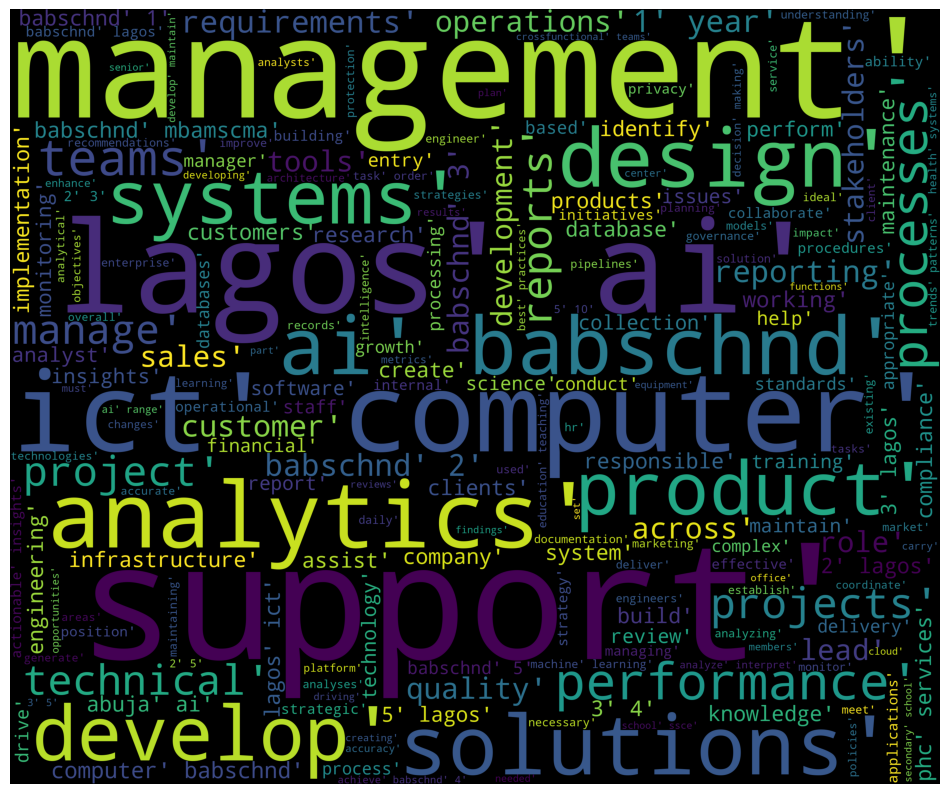

In [74]:
create_wordcloud(combined_df)